#### Chapter 14. 감성 분석

#### colab에서 작성하여 저장한 ipynb 파일입니다.

#### 코드 14.1

In [ ]:
!pip install tfds-korean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 7.3 MB/s 
     |████████████████████████████████| 4.2 MB 20.7 MB/s 
     |████████████████████████████████| 462 kB 75.0 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


#### 코드 14.2

In [ ]:
import tensorflow_datasets as tfds
import tfds_korean.nsmc

dataset = tfds.load("nsmc")  # Naver sentiment movie corpus

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/nsmc/1.0.0.incomplete4GO6FI/nsmc-train.tfrecord*...:   0%|          | 0/15…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/nsmc/1.0.0.incomplete4GO6FI/nsmc-test.tfrecord*...:   0%|          | 0/500…

Dataset nsmc downloaded and prepared to /root/tensorflow_datasets/nsmc/1.0.0. Subsequent calls will reuse this data.


#### [참고]

In [ ]:
type(dataset)

dict

In [ ]:
dataset.keys()

dict_keys(['train', 'test'])

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset['train'])
df.head(10)

,document,label
0,tf.Tensor(b'\xed\x85\x8c\xeb\xa6\xac \xea\xb8\...,"tf.Tensor(0, shape=(), dtype=int64)"
1,tf.Tensor(b'\xeb\xb6\x88\xea\xb0\x80\xeb\x8a\x...,"tf.Tensor(1, shape=(), dtype=int64)"
2,tf.Tensor(b'\xed\x9b\x84\xec\xbf\xa0\xec\x82\x...,"tf.Tensor(0, shape=(), dtype=int64)"
3,tf.Tensor(b'\xec\x9e\x91\xea\xb0\x80\xea\xb0\x...,"tf.Tensor(0, shape=(), dtype=int64)"
4,tf.Tensor(b'\xeb\x8b\xa4\xec\x96\x91\xed\x95\x...,"tf.Tensor(0, shape=(), dtype=int64)"
5,tf.Tensor(b'\xeb\xa7\x88\xec\xb9\x98 \xeb\x8f\...,"tf.Tensor(1, shape=(), dtype=int64)"
6,tf.Tensor(b'\xec\x96\xb4\xeb\x94\x94\xeb\xa1\x...,"tf.Tensor(0, shape=(), dtype=int64)"
7,tf.Tensor(b'\xeb\x8b\xac\xed\x8c\xbd\xec\x9d\x...,"tf.Tensor(1, shape=(), dtype=int64)"
8,tf.Tensor(b'\xec\x9e\xa5\xeb\xa9\xb4 \xec\x9e\...,"tf.Tensor(0, shape=(), dtype=int64)"
9,tf.Tensor(b'\xec\x9e\xac\xeb\xb0\x8c\xeb\x82\x...,"tf.Tensor(0, shape=(), dtype=int64)"


In [ ]:
value1, value2  =dataset.values()
value1

<PrefetchDataset element_spec={'document': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

---
#### 코드 14.3

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fa85658a090>)

#### 코드 14.4

In [ ]:
import pandas as pd
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
train_data.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 코드 14.5

In [ ]:
test_data.head(10)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


#### 코드 14.6

In [ ]:
# 결측지 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
# 결측지 제거
train_data = train_data.dropna(how = 'any')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


#### 코드 14.7

In [ ]:
# 중복 확인
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [ ]:
# 중복 document 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
print(f'학습 데이터셋의 데이터 수 : {len(train_data)}')

학습 데이터셋의 데이터 수 : 146182


#### 코드 14.8

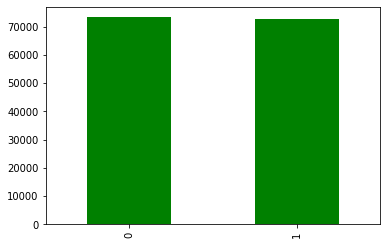

In [ ]:
# 긍정과 부정 분포 시각화
train_data['label'].value_counts().plot(kind = 'bar', color = 'green')

In [ ]:
train_data.groupby('label').size()   # 긍정/부정 label 수 확인

label
0    73342
1    72840
dtype: int64

#### 코드 14.9

In [ ]:
# 문자열 데이터만 수집
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

#### 코드 14.10

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치

Selecting previously unselected package fonts-nanum.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


#### 코드 14.11

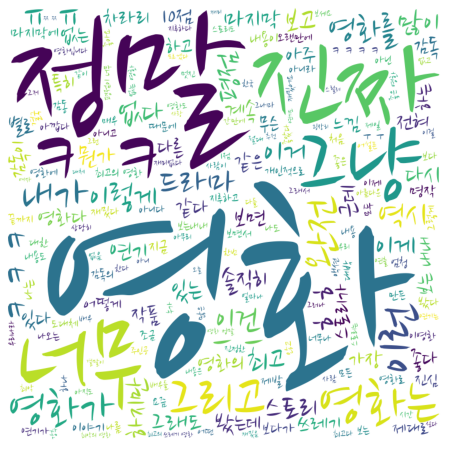

In [ ]:
# word cloud 작성
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font = '/usr/share/fonts/truetype/nanum/NanumBrush.ttf'
wc = WordCloud(font_path=font, background_color='white',
               width=400, height=400, scale=2.0, max_font_size=250)
my_wordcloud = wc.generate(' '.join(train_review))

plt.figure(figsize=(10,8))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

---
#### 형태소 분석을 위한 환경 구축

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 705 kB/s 
     |████████████████████████████████| 453 kB 70.5 MB/s 


#### 코드 14.12

In [ ]:
from konlpy.tag import Okt
import re

stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)   # 한글 및 공백 제외한 문자 제거
    word_review = okt.morphs(review_text,stem=True)
    word_review = [token for token in word_review if not token in stop_words]
    clean_train_review.append(word_review)
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:11]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다'],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  'ㅋㅋㅋ',
  '별',
  '반개',
  '도',
  '아깝다',
  '움'],
 ['원작', '긴장감', '을', '제대로', '살리다', '하다'],
 ['별',
  '반개',
  '도',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '가족',
  '도',
  '없다',
  '연기',
  '못',
  '하다',
  '사람',
  '만',
  '모',
  '엿',
  '네'],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜케',
  '평점',
  '낮다',
  '꽤',
  '볼',
  '만',
  '데',
  '헐리우드',
  '식',
  '화려하다',
  '너무',
  '길들이다',
  '있다'],
 ['걍', '인피니트', '짱', '이다',

#### 코드 14.13

In [ ]:
#테스트 리뷰도 동일하게 전처리

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)   # 한글 및 공백 제외한 문자 제거
    word_review = okt.morphs(review_text,stem=True)
    word_review = [token for token in word_review if not token in stop_words]
    clean_test_review.append(word_review)
  else:
    clean_test_review.append([])

clean_test_review[:5]

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'],
 ['만',
  '아니다',
  '별',
  '다섯',
  '개',
  '주다',
  '왜',
  '로',
  '나오다',
  '제',
  '심기',
  '를',
  '불편하다',
  '하다']]

#### 코드 14.14 & 15

In [ ]:
!pip install tensorflow==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 53 kB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 3.8 MB 50.0 MB/s 
     |████████████████████████████████| 449 kB 76.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2752906f72ef58e85f4e61a69b32579093d16de20e0ca5dcb493b7e3e2d7efa3
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uni

#### 코드 14.17

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# 인덱스 벡터 변환 
# 일정 길이 충족 안되면, 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태

# 학습 데이터셋
train_inputs = pad_sequences(train_sequences, maxlen=8, padding='post')

# 학습 데이터셋 label 벡터화
train_labels = np.array(train_data['label'])

# 테스트 데이터셋
test_inputs = pad_sequences(test_sequences, maxlen=8, padding='post')

# 테스트 데이터셋 label 벡터화
test_labels = np.array(test_data['label'])

#### 코드 14.18

In [ ]:
DEFAULT_PATH  = '/content/'
DATA_PATH = 'CLEAN_DATA/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
import json
json.dump(data_configs,open(DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

#### [참고]

In [ ]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = '/content/CLEAN_DATA/'
DATA_OUT = '/content/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

#### 코드 14.19

In [ ]:
#전처리 데이터 불러오기
DATA_PATH = '/content/CLEAN_DATA/'
DATA_OUT = '/content/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

#### 코드 14.20

In [ ]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 5
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 
       'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

#### 코드 14.21

In [ ]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',
                                    activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) \
                      for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

#### 코드 14.22

In [ ]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'/weogjts.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

/content/DATA_OUT/cnn_classifier_kr -- Folder create complete 

Epoch 1/5
257/257 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.7750
Epoch 1: val_accuracy improved from -inf to 0.82393, saving model to /content/DATA_OUT/cnn_classifier_kr/weogjts.h5
257/257 [==============================] - 22s 15ms/step - loss: 0.4613 - accuracy: 0.7750 - val_loss: 0.3933 - val_accuracy: 0.8239
Epoch 2/5
256/257 [============================>.] - ETA: 0s - loss: 0.3556 - accuracy: 0.8450
Epoch 2: val_accuracy improved from 0.82393 to 0.82625, saving model to /content/DATA_OUT/cnn_classifier_kr/weogjts.h5
257/257 [==============================] - 3s 10ms/step - loss: 0.3555 - accuracy: 0.8451 - val_loss: 0.3842 - val_accuracy: 0.8263
Epoch 3/5
252/257 [============================>.] - ETA: 0s - loss: 0.3005 - accuracy: 0.8732
Epoch 3: val_accuracy improved from 0.82625 to 0.82660, saving model to /content/DATA_OUT/cnn_classifier_kr/weogjts.h5
257/257 [=======================

#### 코드 14.23

In [ ]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = '/content/DATA_OUT/cnn_classifier_kr/weogjts.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights(SAVE_FILE_NM)
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.3891 - accuracy: 0.8287


[0.38907697796821594, 0.828719973564148]

#### 코드 14.24

In [ ]:
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/content/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
# 불용어 지정
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] 
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights(SAVE_FILE_NM) #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))